In [39]:
import matplotlib
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [40]:
filename = '2017-02-23.Hotels.json'
data = pd.read_json(filename)
filename2 = '2017-03-23.Hotels.json'
data2 = pd.read_json(filename2)

In [42]:
data['HotelRating'] = data['HotelRating'].astype(float)
data2['HotelRating'] = data2['HotelRating'].astype(float)

In [44]:
# Clean up location data to ensure consistency
data['Hotelcity'] = data['Hotelcity'].str.replace('North','')
data['Hotelcity'] = data['Hotelcity'].str.replace('Henderson','Las Vegas')
data['Hotelcity'] = data['Hotelcity'].str.replace('Boulder City','Las Vegas')
data['Hotelcity'] = data['Hotelcity'].str.replace('Boulder City','Las Vegas')
data['Hotelcity'] = data['Hotelcity'].str.replace('Jean','Las Vegas')
data['Hoteladdress'] = data['Hoteladdress'].str.replace('Boulevard','Blvd')
data['Hoteladdress'] = data['Hoteladdress'].str.replace('South','S')
data['Hoteladdress'] = data['Hoteladdress'].str.replace('Highway','Hwy')
data['Hoteladdress'] = data['Hoteladdress'].str.replace('.','')


data2['Hotelcity'] = data2['Hotelcity'].str.replace('North','')
data2['Hotelcity'] = data2['Hotelcity'].str.replace('Henderson','Las Vegas')
data2['Hotelcity'] = data2['Hotelcity'].str.replace('Boulder City','Las Vegas')
data2['Hotelcity'] = data2['Hotelcity'].str.replace('Jean','Las Vegas')
data2['Hoteladdress'] = data2['Hoteladdress'].str.replace('Boulevard','Blvd')
data2['Hoteladdress'] = data2['Hoteladdress'].str.replace('South','S')
data2['Hoteladdress'] = data2['Hoteladdress'].str.replace('Highway','Hwy')
data2['Hoteladdress'] = data2['Hoteladdress'].str.replace('.','')

In [45]:
NoDupsData = data.drop_duplicates()
len(NoDupsData)

252

In [46]:
NoDupsData2 = data2.drop_duplicates()
len(NoDupsData2)

252

In [47]:
#Create a dataframe containing the intersection of the two.
dataInnerMerge = pd.merge(NoDupsData, NoDupsData2, \
                          on=['HotelRating','Hotelprice','Hotelprice_Discount','Hotelreviews'],\
                          how='inner')
len(dataInnerMerge)

5

In [48]:
NoDupsData['key1'] = 1
dataInnerMerge['key2'] = 1
dataInnerMerge.head()

/Users/luis/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,HotelRating,Hoteladdress_x,Hotelcity_x,Hotelname_x,Hotelpostalcode_x,Hotelprice,Hotelprice_Discount,Hotelreviews,Hotelstate_x,Hoteladdress_y,Hotelcity_y,Hotelname_y,Hotelpostalcode_y,Hotelstate_y,key2
0,4.4,125 East Harmon Avenue,", Las Vegas",AAA 2 Rooms 2 Bath Suite at The Signature Cond...,", 89109",none,none,none,", NV",4250 Koval Ln,", Las Vegas",Ellis Island Hotel and Casino,", 89109",", NV",1
1,4.5,863 Westminster Ave,", Las Vegas",Vegas Vacation Villa Pet Friendly,", 89119",none,none,none,", NV",3720 Las Vegas Blvd S,", Las Vegas",Aria Sky Suites,", 89158",", NV",1
2,4.5,863 Westminster Ave,", Las Vegas",Vegas Vacation Villa Pet Friendly,", 89119",none,none,none,", NV",4770 Topaz Street,", Las Vegas",1 Bedroom Apt In Topaz St,", 89121",", NV",1
3,4.5,863 Westminster Ave,", Las Vegas",Vegas Vacation Villa Pet Friendly,", 89119",none,none,none,", NV",8225 Las Vegas Blvd S,", Las Vegas",Oakwood At One Las Vegas,", 89123",", NV",1
4,4.5,863 Westminster Ave,", Las Vegas",Vegas Vacation Villa Pet Friendly,", 89119",none,none,none,", NV",2570 W Harmon Ave,", Las Vegas",Dignitary Discretion Las Vegas,", 89158",", NV",1


In [49]:
closedHotels = pd.merge(NoDupsData, dataInnerMerge, \
                      on=['HotelRating','Hotelprice','Hotelprice_Discount','Hotelreviews'],\
                      how = 'left')
closedHotels

,HotelRating,Hoteladdress,Hotelcity,Hotelname,Hotelpostalcode,Hotelprice,Hotelprice_Discount,Hotelreviews,Hotelstate,key1,...,Hotelcity_x,Hotelname_x,Hotelpostalcode_x,Hotelstate_x,Hoteladdress_y,Hotelcity_y,Hotelname_y,Hotelpostalcode_y,Hotelstate_y,key2
0,4.5,3708 Las Vegas Blvd S,", Las Vegas",The Cosmopolitan Of Las Vegas,", 89109",none,$170,"4,830 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.5,4500 W Tropicana Ave,", Las Vegas",The Orleans Hotel & Casino,", 89103",$50,none,"2,410 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.5,3595 Las Vegas Blvd S,", Las Vegas",The Cromwell,", 89109",$94,none,738 reviews,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.5,3575 Las Vegas Blvd S,", Las Vegas",Hilton Grand Vacations at The Flamingo,", 89109",none,$110,160 reviews,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.5,4000 W Flamingo Rd,", Las Vegas",Gold Coast Hotel and Casino,", 89103",none,$45,"1,166 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.5,3555 Las Vegas Blvd S,", Las Vegas",Flamingo Las Vegas,", 89109",none,$30,"11,083 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.5,3645 Las Vegas Blvd S,", Las Vegas",Bally's Las Vegas,", 89109",none,$30,"8,578 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,3570 Las Vegas Blvd S,", Las Vegas",Anthology Suites and Villas at Caesars Palace,", 89109",none,$240,8 reviews,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.5,3570 Las Vegas Blvd S,", Las Vegas",Nobu Hotel,", 89109",none,$149,224 reviews,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.5,3570 Las Vegas Blvd S,", Las Vegas",Caesars Palace,", 89109",none,$129,"6,299 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
closedHotels = closedHotels[~(closedHotels.key2 == closedHotels.key1)]
closedHotels

,HotelRating,Hoteladdress,Hotelcity,Hotelname,Hotelpostalcode,Hotelprice,Hotelprice_Discount,Hotelreviews,Hotelstate,key1,...,Hotelcity_x,Hotelname_x,Hotelpostalcode_x,Hotelstate_x,Hoteladdress_y,Hotelcity_y,Hotelname_y,Hotelpostalcode_y,Hotelstate_y,key2
0,4.5,3708 Las Vegas Blvd S,", Las Vegas",The Cosmopolitan Of Las Vegas,", 89109",none,$170,"4,830 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.5,4500 W Tropicana Ave,", Las Vegas",The Orleans Hotel & Casino,", 89103",$50,none,"2,410 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.5,3595 Las Vegas Blvd S,", Las Vegas",The Cromwell,", 89109",$94,none,738 reviews,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.5,3575 Las Vegas Blvd S,", Las Vegas",Hilton Grand Vacations at The Flamingo,", 89109",none,$110,160 reviews,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.5,4000 W Flamingo Rd,", Las Vegas",Gold Coast Hotel and Casino,", 89103",none,$45,"1,166 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.5,3555 Las Vegas Blvd S,", Las Vegas",Flamingo Las Vegas,", 89109",none,$30,"11,083 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.5,3645 Las Vegas Blvd S,", Las Vegas",Bally's Las Vegas,", 89109",none,$30,"8,578 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,3570 Las Vegas Blvd S,", Las Vegas",Anthology Suites and Villas at Caesars Palace,", 89109",none,$240,8 reviews,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.5,3570 Las Vegas Blvd S,", Las Vegas",Nobu Hotel,", 89109",none,$149,224 reviews,", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.5,3570 Las Vegas Blvd S,", Las Vegas",Caesars Palace,", 89109",none,$129,"6,299 reviews",", NV",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
NoDupsData2['key1'] = 1
newHotels = pd.merge(NoDupsData2, dataInnerMerge, \
                      on=['HotelRating','Hotelprice','Hotelprice_Discount','Hotelreviews'],\
                      how = 'left')
newHotels = newHotels[~(newHotels.key2 == newHotels.key1)]
newHotels = newHotels.drop(['key1','key2'], axis=1)
len(newHotels)

247

In [52]:
NoDupsData

,HotelRating,Hoteladdress,Hotelcity,Hotelname,Hotelpostalcode,Hotelprice,Hotelprice_Discount,Hotelreviews,Hotelstate,key1
0,4.5,3708 Las Vegas Blvd S,", Las Vegas",The Cosmopolitan Of Las Vegas,", 89109",none,$170,"4,830 reviews",", NV",1
1,4.5,4500 W Tropicana Ave,", Las Vegas",The Orleans Hotel & Casino,", 89103",$50,none,"2,410 reviews",", NV",1
2,4.5,3595 Las Vegas Blvd S,", Las Vegas",The Cromwell,", 89109",$94,none,738 reviews,", NV",1
3,4.5,3575 Las Vegas Blvd S,", Las Vegas",Hilton Grand Vacations at The Flamingo,", 89109",none,$110,160 reviews,", NV",1
4,4.5,4000 W Flamingo Rd,", Las Vegas",Gold Coast Hotel and Casino,", 89103",none,$45,"1,166 reviews",", NV",1
5,4.5,3555 Las Vegas Blvd S,", Las Vegas",Flamingo Las Vegas,", 89109",none,$30,"11,083 reviews",", NV",1
6,4.5,3645 Las Vegas Blvd S,", Las Vegas",Bally's Las Vegas,", 89109",none,$30,"8,578 reviews",", NV",1
7,4.5,3570 Las Vegas Blvd S,", Las Vegas",Anthology Suites and Villas at Caesars Palace,", 89109",none,$240,8 reviews,", NV",1
8,4.5,3570 Las Vegas Blvd S,", Las Vegas",Nobu Hotel,", 89109",none,$149,224 reviews,", NV",1
9,4.5,3570 Las Vegas Blvd S,", Las Vegas",Caesars Palace,", 89109",none,$129,"6,299 reviews",", NV",1


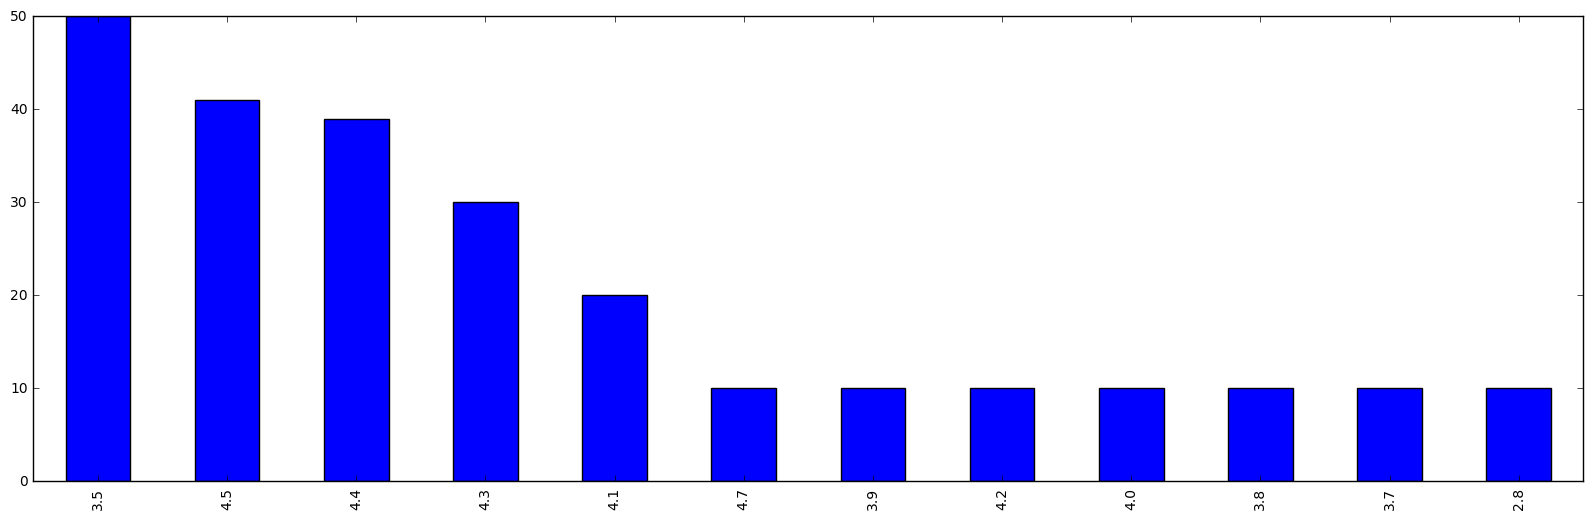

In [53]:
closedHotels['HotelRating'].value_counts().plot.bar(figsize = (20,6))
plt.show()

([<matplotlib.patches.Wedge at 0x11636b2b0>,
  <matplotlib.text.Text at 0x11640a5c0>])

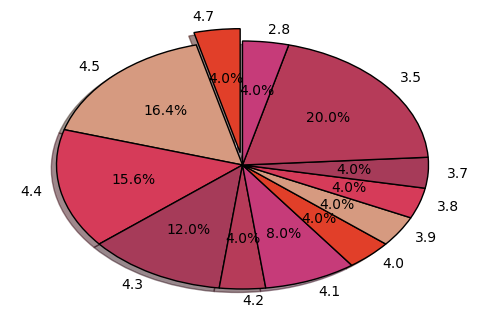

In [54]:
# Create a Pie Chart of New, Like New, and Used products
colors = ["#E13F29", "#D69A80", "#D63B59","#A63B59","#B63B59","#C63B79"]
# Create a pie chart
plt.pie(
    [closedHotels.HotelRating[closedHotels.HotelRating == 4.7].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.5].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.4].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.3].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.2].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.1].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 4.0].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 3.9].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 3.8].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 3.7].count(), \
     closedHotels.HotelRating[closedHotels.HotelRating == 3.5].count(),\
     closedHotels.HotelRating[closedHotels.HotelRating == 2.8].count()],
    labels= ['4.7','4.5','4.4','4.3','4.2','4.1','4.0','3.9','3.8','3.7','3.5','2.8'],
    shadow=True,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.1,0, 0,0,0,0,0,0,0,0,0,0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

In [ ]:
#Difficulties
    #I Want to know why is it giving me an error on the third column. It was working fine until today. 
    #Could you give me some feedback ?